## Loading Data from Excel (xlsx)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('Unicorn_Companies.xlsx')

# Show basic information about the dataset

In [2]:
# Show basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


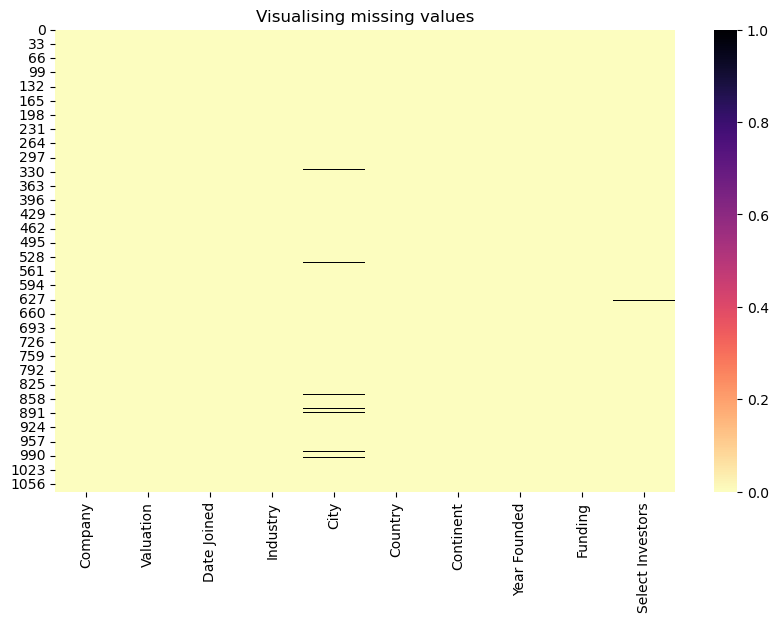

In [3]:
plt.figure(figsize = (10, 6))
plt.title('Visualising missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

### Observation
- The above output shows that the data has 1,074 rows and 10 columns. 
- The City column has 16 missing values and Select Investors column has 1 N/A showing the location in the heatmap above. 
- Funding and valuation columns which according to the data dictionary should be integers are objects.
- Date Joined column needs to be converted to datetime to enable us calculate the years to become unicorn.

# Data Cleaning and Manupulation
- Converting data types from object to numeric (Valuation and Funding Columns)
- Handling missing values
- Converting date column to Datetime and creating a new column to include "Years to Unicorn"
- Creating a column for calculating Return on Investment (ROI)

In [4]:
# Rename values in the 'Industry' column
df['Industry'] = df['Industry'].replace('Artificial intelligence', 'Artificial Intelligence', regex = True)

In [5]:
# Convert Valuation column to numeric (billions)
df['Valuation'] = df['Valuation'].astype(str).str.replace('[^\d\.]', '', regex=True)
df['Valuation'] = df['Valuation'].str.replace('B', '').astype(float)

# Convert Funding column to numeric (billions)
# Defining the conversion function
def convert_funding(value):
    if value.endswith('B'):
        return float(value[1:-1])
    elif value.endswith('M'):
        return float(value[1:-1]) / 1000
    elif value == '$0M':
        return 0.000000001 # Converting $0M to $1 to avoid errors with formulas
    elif value == '$0B':
        return 0.000000001 # Converting $0B to $1 to avoid errors with formulas
    else:
        return None
    
# Apply the conversion function to the 'Funding' column
df['Funding'] = df['Funding'].apply(convert_funding)

In [6]:
# Replace all missing values with Unknown and 0
df['City'].fillna(value = 'Unknown', inplace = True)
df['Select Investors'].fillna(value = 'Unknown', inplace = True)
df['Funding'].fillna(value = 0.000000001, inplace = True) # Replacing null in funding with $1 to avoid errors with formulas

# Replace 0 values in the 'Funding' column with a float value
df['Funding'] = df['Funding'].replace(0, 0.000000001) # Replacing 0 in funding with $1 to avoid errors with formulas

In [7]:
# Convert 'Date Joined' column to datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Calculate and Create new column for years to become a unicorn
df['Years to Unicorn'] = (df['Date Joined'].dt.year - df['Year Founded']).fillna(0).astype(int)

In [8]:
# Calculate the ROI based on valuation and funding
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']

# Calculate the annualized ROI based on years to unicorn
df['Annualised ROI'] = df['ROI'] / df['Years to Unicorn']

# Replace 'inf' values in the 'Annualised ROI' column with corresponding 'ROI' values
df.loc[df['Annualised ROI'] == float('inf'), 'Annualised ROI'] = df['ROI']

# Round the calculated values to one decimal place
df['ROI'] = df['ROI'].round(1)
df['Annualised ROI'] = df['Annualised ROI'].round(1)

df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years to Unicorn,ROI,Annualised ROI
0,Bytedance,180.0,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",5,21.5,4.3
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,13.3,1.3
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",10,49.0,4.9
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",4,46.5,11.6
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",6,10.5,1.8


### Observations:
- After converting Funding column to numeric, it was observed that we had 12 missing values. 
- Further investigation shows the missing values where labelled "Unknown" before conversion.
- Because the column was an object, it didn't show as a missing value.
- All missing values in Funding were replaced with $1 in units Billions (0.000000001) to avoid errors when calculating ROI
- It was observed in the industry column that there is Artificial intelligence and Artificial Intelligence and because python is case sensitive, it was renamed to make it one (Artificial Intelligence)
- To obtain the realistic ROI for each company, the Annualised Return on Investment was calculated which takes into consideration the Years to Unicorn for each company

In [9]:
# Showing basic information about the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
 10  Years to Unicorn  1074 non-null   int64         
 11  ROI               1074 non-null   float64       
 12  Annualised ROI    1074 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 109.2+ KB


# Univariate Analysis
### Considering one feature of the dataset

In [9]:
# Summary statistics of numeric columns
df.describe().astype('int')

,Valuation,Year Founded,Funding,Years to Unicorn,ROI,Annualised ROI
count,1074,1074,1074,1074,1074,1074
mean,3,2012,0,7,19553082,3895176
std,8,5,0,5,212799616,49952902
min,1,1919,0,-4,0,-1
25%,1,2011,0,4,2,0
50%,2,2014,0,6,4,0
75%,3,2016,0,9,7,1
max,180,2021,14,98,3999999999,999999999


### Observation:
- The description statistics output shows that the average valution of Unicorns is $3B
- Also shows that on an average it takes about 7 years for companies to be a Unicorn
- According to the output above, most Unicorn companies reported started in 2012
- It was also observed that Yidian Zixun company reached Unicorn status 4 years before the company was founded but there is no enough information to know the reason

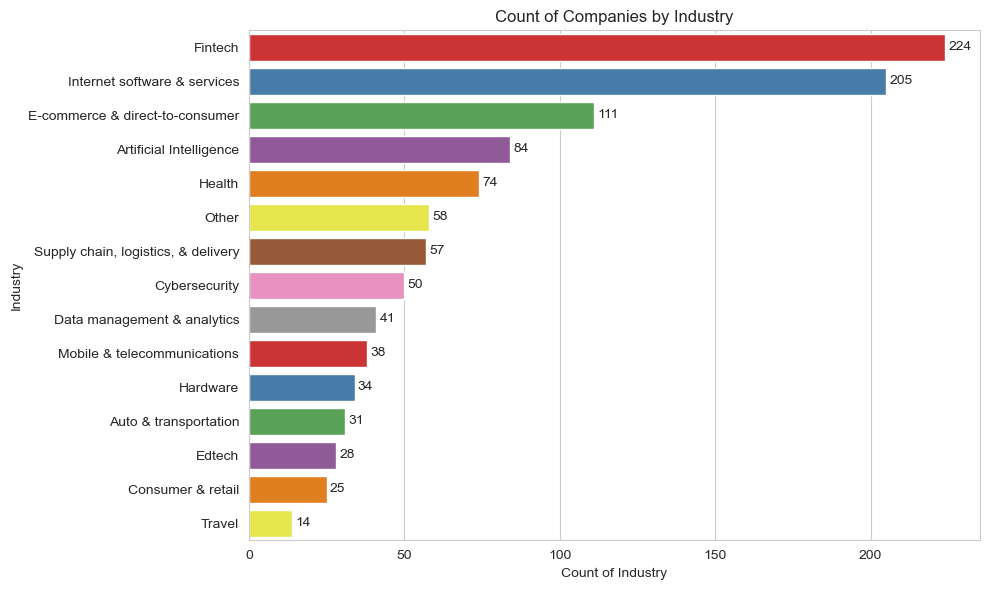

In [10]:
# Visualising using a bar chart
plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
industry_counts = df['Industry'].value_counts()

# Create the count plot
sns.countplot(data = df, y = 'Industry', palette = 'Set1', order=industry_counts.index)

# Annotate each bar with the respective count
for idx, count in enumerate(industry_counts):
    plt.text(count + 1, idx, str(count), va = 'center')

plt.title('Count of Companies by Industry')
plt.xlabel('Count of Industry')
plt.ylabel('Industry')
plt.tight_layout()

# Show the visualisation
plt.show()


### Observation:
- Fintech Industry has the highest number of Unicorns suming up to 224 as at March 2022 while Travel industry has the least Unicorn summing up to 14 Unicorn companies. The IT sector dominates the top 3 Industy with most Unicorn.

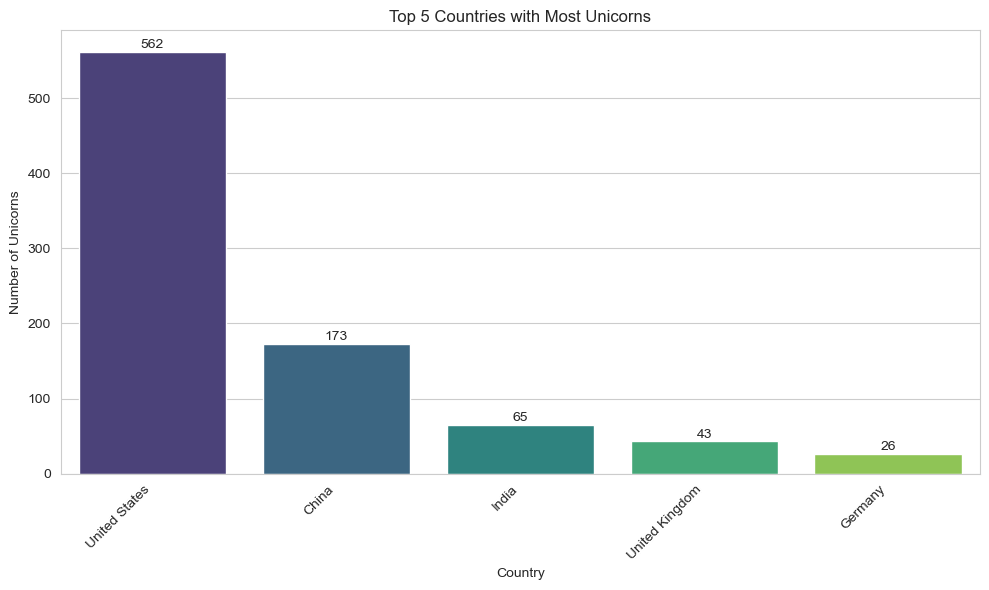

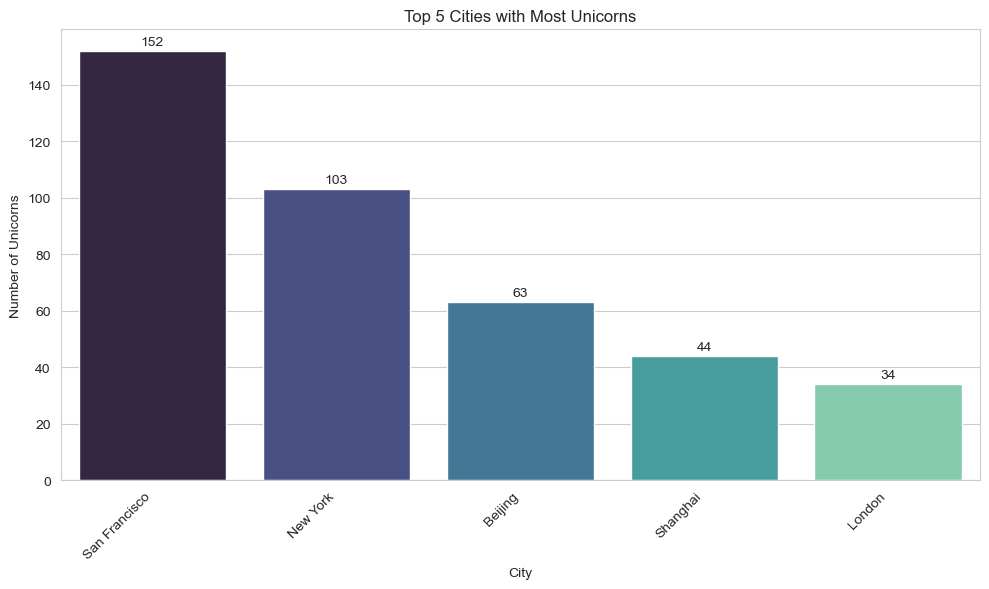

In [11]:
# Visualising Number of Unicorns per Country
# Count the number of unicorns per country and select the top 5
top_countries = df['Country'].value_counts().nlargest(5)

# Create a bar chart for number of unicorns in top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.title('Top 5 Countries with Most Unicorns')
plt.xticks(rotation=45, ha='right')

# Annotate bars with the Industry count
for index, value in enumerate(top_countries.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

# Show the visual
plt.tight_layout()
plt.show()

# Visualising Number of Unicorns per Country
# Count the number of unicorns per city and select the top 5
top_cities = df['City'].value_counts().nlargest(5)

# Create a bar chart for number of unicorns in top 5 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='mako')
plt.xlabel('City')
plt.ylabel('Number of Unicorns')
plt.title('Top 5 Cities with Most Unicorns')
plt.xticks(rotation=45, ha='right')

# Annotate bars with the Industry count
for index, value in enumerate(top_cities.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

# Show the visual
plt.tight_layout()
plt.show()

### Observation:
- From the visuals above, United States of America has the highest number of Unicorns and top two cities with the most Unicorns namely San Fransico and New York with a total of 562 companies. 
- The next country with most Unicorns is China with a total of 173 Unicorns. The next two cities following USA are Beijing and Shanghai which are in China.
- San Francisco appears to be an industrial hub where investors can make huge return on investment

# Bivariate Analysis
### Considering two features, their relationship and its visualisation

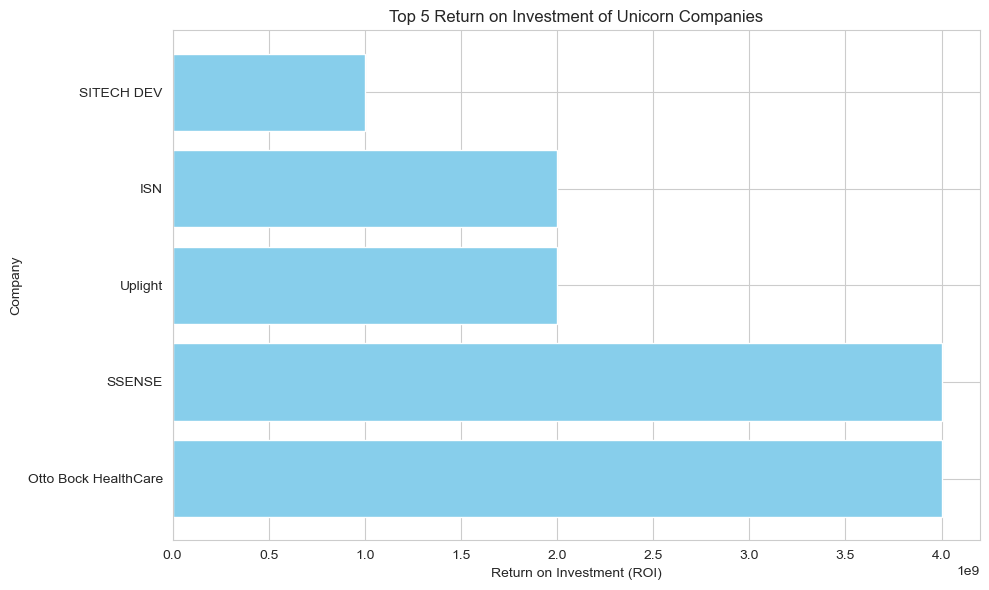

In [12]:
# Sort companies by ROI in descending order and select the top 5
df_sorted = df.nlargest(5, 'ROI')

# Create a bar chart for top 5 ROI of unicorn companies
plt.figure(figsize = (10, 6))
plt.barh(df_sorted['Company'], df_sorted['ROI'], color = 'skyblue')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Company')
plt.title('Top 5 Return on Investment of Unicorn Companies')
plt.tight_layout()
plt.show()

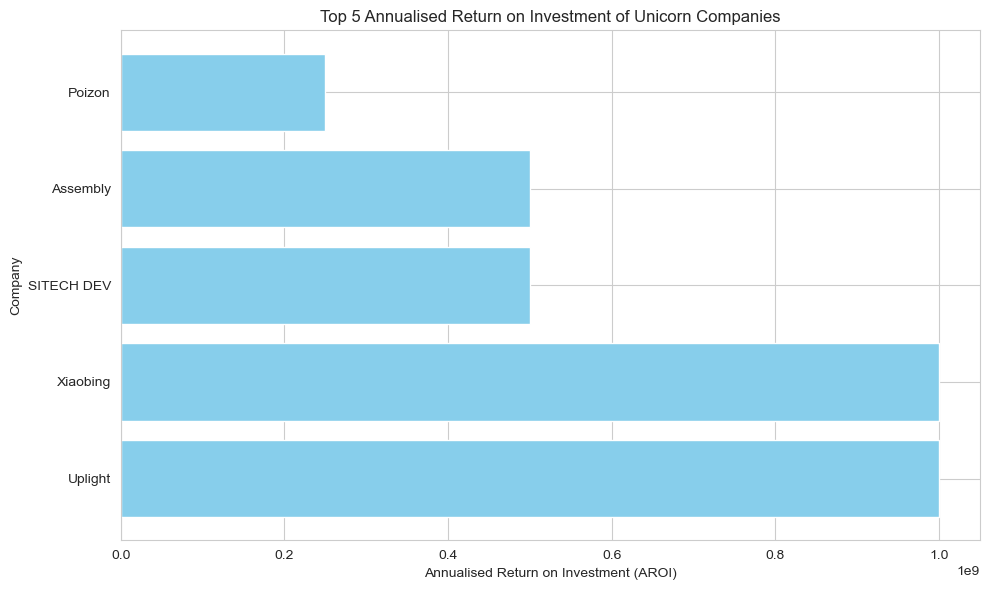

In [13]:
# Sort companies by ROI in descending order and select the top 5
df_sorted = df.nlargest(5, 'Annualised ROI')

# Create a bar chart for top 5 Annualised ROI of unicorn companies
plt.figure(figsize = (10, 6))
plt.barh(df_sorted['Company'], df_sorted['Annualised ROI'], color = 'skyblue')
plt.xlabel('Annualised Return on Investment (AROI)')
plt.ylabel('Company')
plt.title('Top 5 Annualised Return on Investment of Unicorn Companies')
plt.tight_layout()
plt.show()

### Observation:
- In analysing the return on investment, it was analysed using both ROI and annualised return on investment. We took into consideration the yearly ROI since all companies have different years it took them to become Unicorn. The company with the highest ROI is Otto Bock HealthCare and SSENSE with 4 Billion ROI followed by Uplight and RSN with 2 Billion and Sitech Dev with 1 Billion 
- After breaking down the ROI annually, we realised that the company with the highest ROI taking into consideration the years it took the companies to become unicorns are Uplight and Xiaobing with a yearly ROI of 1 Billion followed by Sitech Dev and Assembly with yearly ROI of 500 Million and lastly Poizon with a yearly ROI of 250 Million

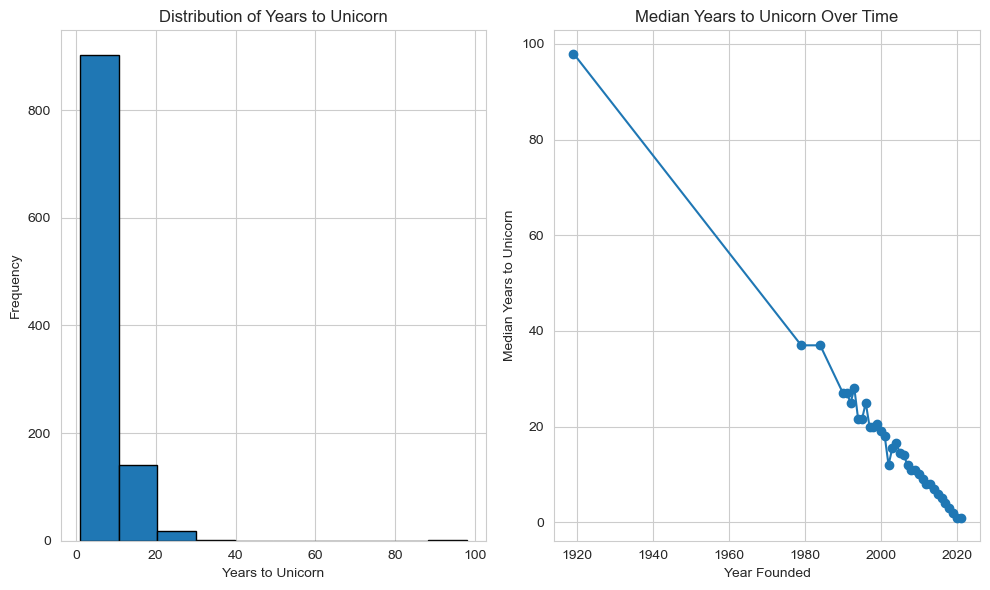

In [14]:
# Filter out companies with years to unicorn equal to 0 (no data)
filtered_df = df[df['Years to Unicorn'] > 0]

# Create a histogram for distribution of years to unicorn
plt.figure(figsize = (10, 6))

plt.subplot(1, 2, 1)
plt.hist(filtered_df['Years to Unicorn'], bins = 10, edgecolor = 'black')
plt.title('Distribution of Years to Unicorn')
plt.xlabel('Years to Unicorn')
plt.ylabel('Frequency')

# Create a line plot for trend over time
plt.subplot(1, 2, 2)
plt.plot(filtered_df.groupby('Year Founded')['Years to Unicorn'].median(), marker = 'o')
plt.title('Median Years to Unicorn Over Time')
plt.xlabel('Year Founded')
plt.ylabel('Median Years to Unicorn')

plt.tight_layout()
plt.show()

### Observation:
- It took more than 900 companies 0 - 10 years to become Unicorns out of 1074 companies under study. Therefore, it takes between 0 - 10 years for these companies to become Unicorn.
- However this has always not been the case. The trend analysis shows that since 1919 which is the earlies year founded for the companies under consideration taking 98 years to become Unicorn company to current day where it takes less than a year for companies to become Unicorn. There has been a decline in the number of years it takes for company to become unicorn.

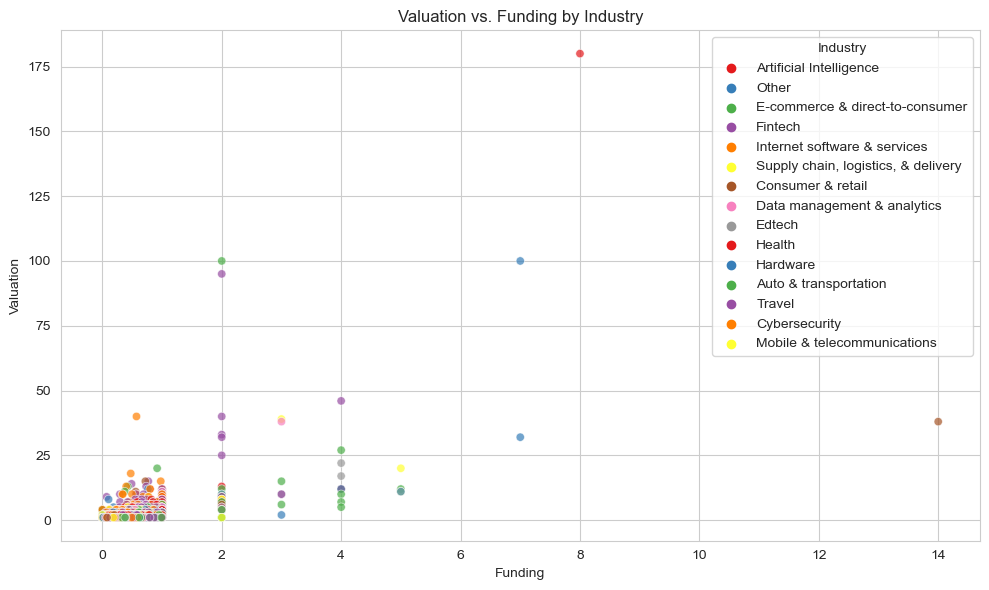

In [15]:
# Valuation vs. Funding by Industry
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Funding', y='Valuation', hue='Industry', palette='Set1', alpha=0.7)
plt.title('Valuation vs. Funding by Industry')
plt.xlabel('Funding')
plt.ylabel('Valuation')
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

### Observation:
- The above visualisation shows that majority of comapnies that have up to 1 Billion funiding do not have a valuation of more than 25 Billion. For companies with 2 Billion Funding, a company got as high as 100 Billion valuation in the E-Commerce & DIrect to customer industry. The industry with the highest valuation of about 180 Billion is Artificial Intelligence with a funding of 8 Billion. While the highest Funding received is from the Consumer and Retail Business with 14 Billion and a Valuation of about 40 Billion

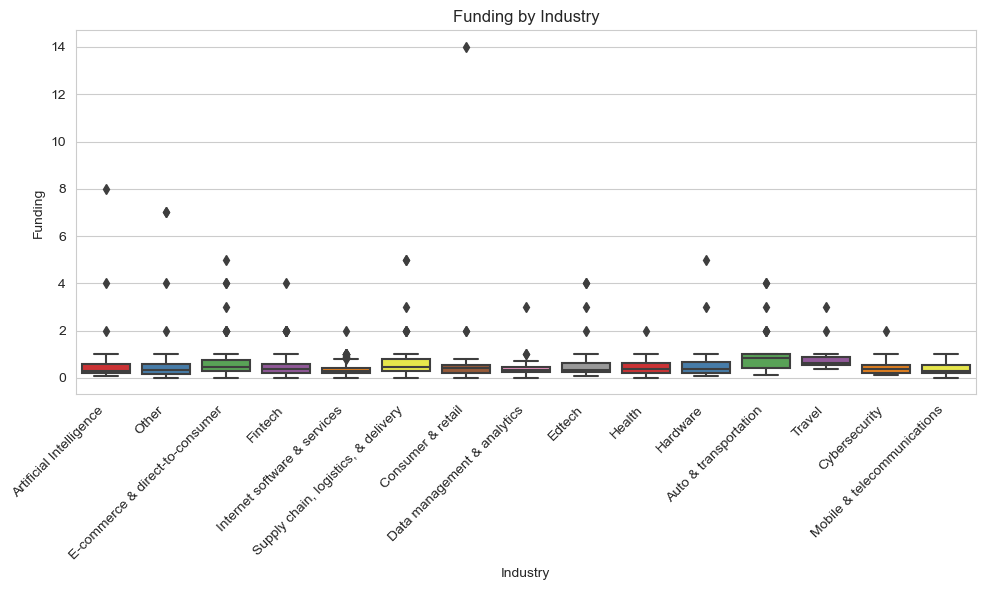

In [16]:
# Funding vs. Industry
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Industry', y='Funding', palette='Set1')
plt.title('Funding by Industry')
plt.xlabel('Industry')
plt.ylabel('Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observation:
- The above visuals show that the Consumer and Retail Industry recieved the highest funding of 14 Billion while the Mobile & Telecommunications industry had the least funding of about 1 Billion.

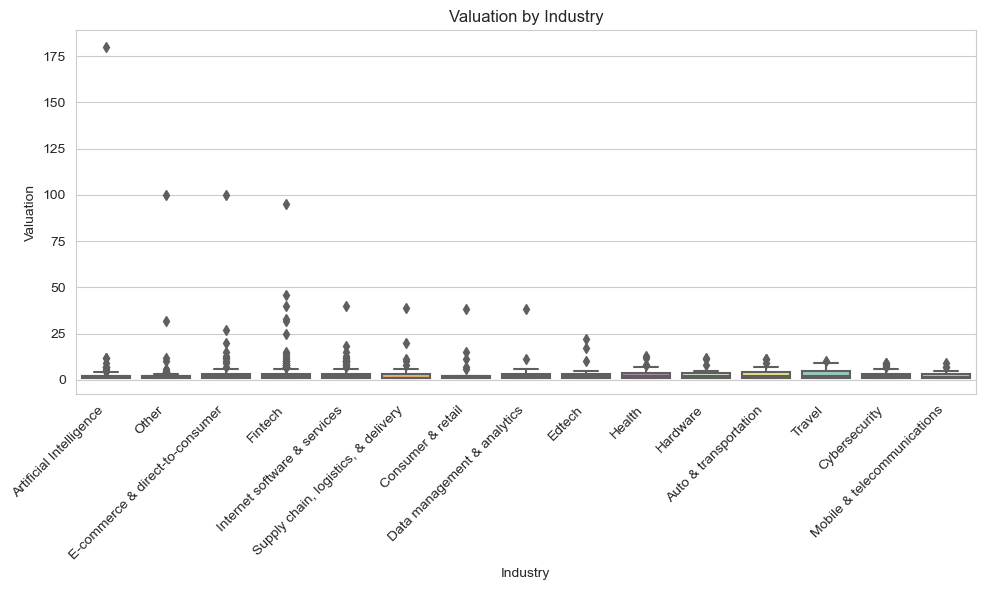

In [17]:
# Industry vs. Valuation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Industry', y='Valuation', palette='Set3')
plt.title('Valuation by Industry')
plt.xlabel('Industry')
plt.ylabel('Valuation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observation
- The above visuals show that the Artifical Intelligence Industry have the highest Valuation of about 180 Billion while the Mobile & Telecommunications and Cybersecurity industry have the least Valuation.

# Multivariate Analysis
### Considering two or more features, their relationship and its visualisation

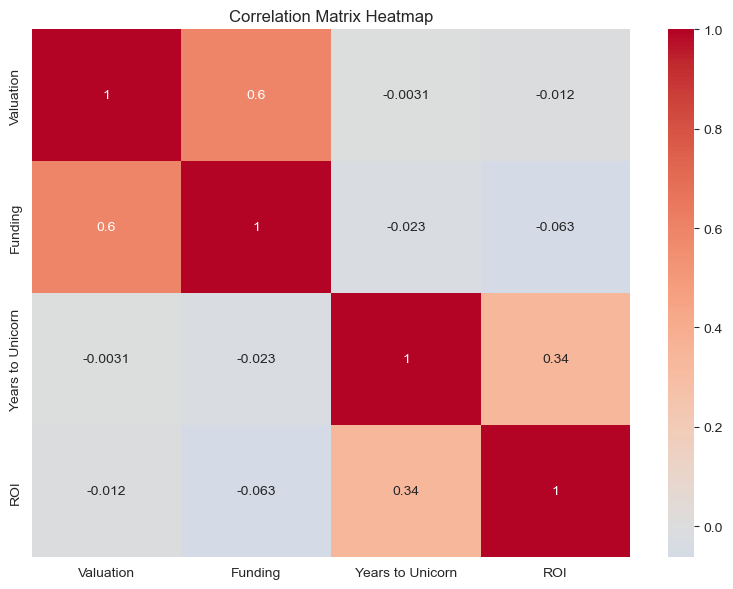

In [18]:
# Select numerical features for multivariate analysis
numerical_features = ['Valuation', 'Funding', 'Years to Unicorn','ROI']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### Observation
- There is a strong positive correlation between Valuation and Funding as expected. This means that the higher the funding received by a company the higher their valuation and vice versa.
- There is also a positive relationship between the years it takes to become unicorn and their ROI.This means the longer the years it takes to become a Unicorn the higher the ROI and vice versa.
- There is a negative relationship between ROI, Valuation and Funding, likewise between Years to Unicorn, Valuation and Funding meaning that a decrease in one will lead to an increase in the other.

#  Investors that have funded the most unicorns

In [19]:
# Split the values in the column by comma
df['Investors'] = df['Select Investors'].str.split(', ')

# Explode the column to have each value in a separate row
df = df.explode('Investors')

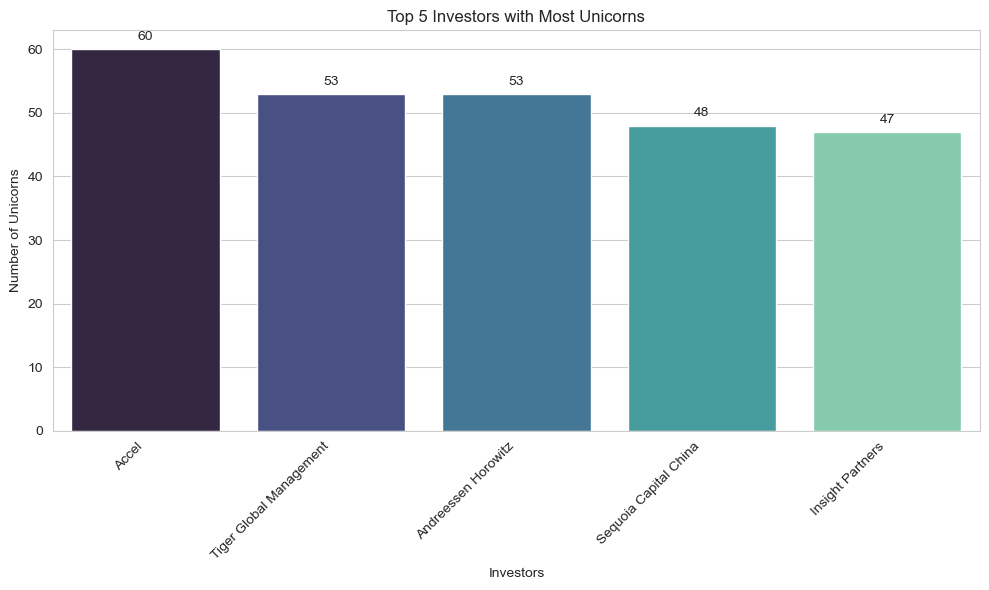

In [20]:
# Visualising Number of Investors per Unicorn
# Count the number of investors per unicorn and select the top 5
top_cities = df['Investors'].value_counts().nlargest(5)

# Create a bar chart for number of unicorns in top 5 cities
plt.figure(figsize = (10, 6))
sns.barplot(x = top_cities.index, y=top_cities.values, palette='mako')
plt.xlabel('Investors')
plt.ylabel('Number of Unicorns')
plt.title('Top 5 Investors with Most Unicorns')
plt.xticks(rotation = 45, ha = 'right')

# Annotate bars with the Industry count
for index, value in enumerate(top_cities.values):
    plt.text(index, value + 1, str(value), ha = 'center', va = 'bottom')

# Show the visual
plt.tight_layout()
plt.show()

### Observation
- The top five investors in Unicorn companies are Accel, Tiger Global Management, Andreessen Horowitz, Sequoia Capital China and Insight Partners, investing in 60, 53, 53, 48 and 47 companies respectively.

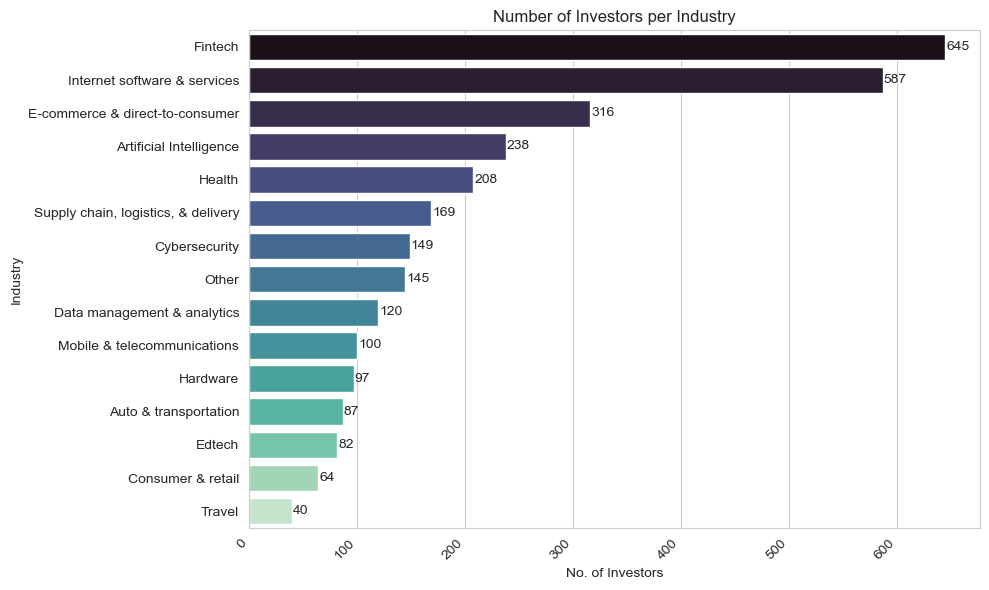

In [21]:
# Group data by industry and count the number of investors
investors_per_industry = df.groupby('Industry')['Investors'].count()

# Select top industries based on the number of investors
top_industries = investors_per_industry.nlargest(20)

# Create a bar chart for number of investors per industry
plt.figure(figsize = (10, 6))
sns.barplot(x = top_industries.values, y = top_industries.index, palette = 'mako')
plt.xlabel('No. of Investors')
plt.ylabel('Industry')
plt.title('Number of Investors per Industry')
plt.xticks(rotation = 45, ha = 'right')

# Annotate bars with the Investor count
for index, value in enumerate(top_industries.values):
    plt.text(value + 1, index, str(value), va = 'center')

# Show the visual
plt.tight_layout()
plt.show()

#### Observation
- The above visual further clarifies that Fintech Industry has the highest number of Unicorns having a total of 645 investors as at March 2022 while Travel industry has the least number of investors with a total of 40 investors. The IT sector dominates the top 4 Industy with most Investors.